### Imports

In [5]:
import numpy as np
import pandas as pd
from pydlm import dlm, dynamic, trend, seasonality

In [6]:
%matplotlib inline

### Input File

In [72]:
pwd

'C:\\Users\\t0272m1\\Projects\\HR Analytics'

In [73]:
path = 'C:/Users/t0272m1/Projects/HR Analytics/input/'

In [74]:
file_name = '\\'.join([path, 'abs_jnap_20190402_model_daily_crew_pline_tbl_seq.csv'])
df = pd.read_csv(file_name)

In [75]:
df.shape

(55713, 55)

In [76]:
df.columns

Index(['workdate', 'crew', 'production_line', 'group_total', 'lost_hours',
       'actual_hours', 'paa_hours', 'absences_unplanned', 'absences_late',
       'absences_noshow', 'absences_any', 'mean_absence_pct',
       'mean_experience', 'absences_planned', 'home_canvasses',
       'absences_fmla', 'peia_count', 'tpt_count', 'streak_1', 'streak_2',
       'streak_3', 'streak_4_plus', 'cluster', 'au_rolling_5', 'au_rolling_12',
       'au_rolling_20', 'au_rolling_median_5', 'au_rolling_median_12',
       'au_rolling_median_20', 'actual_hours_rolling_mean_20',
       'actual_hours_rolling_median_20', 'lost_hours_rolling_mean_20',
       'lost_hours_rolling_median_20', 'tpt_unplanned', 'tpt_extra',
       'kp_residual_5', 'kp_residual_12', 'kp_residual_20', 'year', 'month',
       'week', 'day', 'day_of_week', 'day_of_year', 'quarter',
       'next_day_delta', 'precip', 'snowfall', 'snow_depth', 'temp_avg',
       'temp_max', 'temp_min', 'fog', 'temp_delta', 'nth_kday'],
      dtype='obje

### Exploratory

In [77]:
for f in df.columns:
    print(f, df[f].dtype)

workdate object
crew object
production_line object
group_total float64
lost_hours float64
actual_hours float64
paa_hours float64
absences_unplanned int64
absences_late float64
absences_noshow float64
absences_any float64
mean_absence_pct float64
mean_experience float64
absences_planned float64
home_canvasses float64
absences_fmla float64
peia_count int64
tpt_count float64
streak_1 float64
streak_2 float64
streak_3 float64
streak_4_plus float64
cluster float64
au_rolling_5 float64
au_rolling_12 float64
au_rolling_20 float64
au_rolling_median_5 float64
au_rolling_median_12 float64
au_rolling_median_20 float64
actual_hours_rolling_mean_20 float64
actual_hours_rolling_median_20 float64
lost_hours_rolling_mean_20 float64
lost_hours_rolling_median_20 float64
tpt_unplanned float64
tpt_extra float64
kp_residual_5 float64
kp_residual_12 float64
kp_residual_20 float64
year int64
month int64
week int64
day int64
day_of_week int64
day_of_year int64
quarter int64
next_day_delta float64
precip float

### Data Subsets

In [78]:
df['production_line'].value_counts()

                 3974
Material         3967
Final 2          3959
Final 1          3954
Trim 1           3950
Chassis 3        3944
Door Line        3943
Chassis 1 & 2    3942
Engine Line      3939
Sunroof Deck     3938
Trim 2           3934
Body Shop        3927
Paint Shop       3877
Chassis 4        2266
Rolls            2199
Name: production_line, dtype: int64

In [79]:
subset_data = True
if subset_data:
    crew = 'A'
    pline = 'Trim 1'
    df = df.query('crew == @crew').query('production_line == @pline')

In [80]:
df.shape

(1348, 55)

In [81]:
ntail = 1000
df = df.tail(ntail)

In [82]:
df.sample(20)

,workdate,crew,production_line,group_total,lost_hours,actual_hours,paa_hours,absences_unplanned,absences_late,absences_noshow,...,next_day_delta,precip,snowfall,snow_depth,temp_avg,temp_max,temp_min,fog,temp_delta,nth_kday
48184,2018-05-15,A,Trim 1,109.0,90.8,1075.0,95.0,12,1.0,9.0,...,1.0,0.36,0.0,0.0,68.0,73.0,55.0,1.0,-4.0,3
19860,2015-02-17,A,Trim 1,127.0,110.0,1257.4,28.0,10,0.0,11.0,...,1.0,0.00,0.3,11.8,8.0,21.0,-2.0,1.0,13.0,3
53374,2018-12-11,A,Trim 1,104.0,100.1,1045.2,20.0,5,1.0,10.0,...,1.0,0.00,0.0,0.0,29.0,35.0,25.0,0.0,6.0,2
33976,2016-09-29,A,Trim 1,113.0,40.3,1107.1,20.0,5,1.0,4.0,...,4.0,2.87,0.0,0.0,60.0,64.0,59.0,1.0,4.0,5
52774,2018-11-15,A,Trim 1,113.0,102.7,1103.7,0.0,13,4.0,10.0,...,4.0,0.25,1.5,0.0,32.0,35.0,29.0,1.0,1.0,3
38425,2017-04-05,A,Trim 1,109.0,81.0,1073.2,0.0,8,1.0,8.0,...,1.0,0.71,0.0,0.0,47.0,50.0,40.0,1.0,-7.0,1
22332,2015-06-09,A,Trim 1,102.0,50.7,1018.3,80.0,3,2.0,5.0,...,1.0,0.00,0.0,0.0,68.0,78.0,60.0,0.0,-2.0,2
28716,2016-03-02,A,Trim 1,117.0,112.4,1183.0,0.0,16,5.0,11.0,...,1.0,0.00,0.0,3.1,22.0,28.0,18.0,0.0,-5.0,1
21209,2015-04-20,A,Trim 1,96.0,70.0,963.0,40.0,11,0.0,7.0,...,1.0,0.11,0.0,0.0,57.0,66.0,46.0,1.0,3.0,3
47284,2018-04-10,A,Trim 1,111.0,60.0,1100.0,28.0,4,0.0,6.0,...,1.0,0.00,0.0,0.0,37.0,47.0,30.0,1.0,7.0,2


### Train and Test

In [84]:
target = 'absences_unplanned'
y = df[target]

In [85]:
df.columns

Index(['workdate', 'crew', 'production_line', 'group_total', 'lost_hours',
       'actual_hours', 'paa_hours', 'absences_unplanned', 'absences_late',
       'absences_noshow', 'absences_any', 'mean_absence_pct',
       'mean_experience', 'absences_planned', 'home_canvasses',
       'absences_fmla', 'peia_count', 'tpt_count', 'streak_1', 'streak_2',
       'streak_3', 'streak_4_plus', 'cluster', 'au_rolling_5', 'au_rolling_12',
       'au_rolling_20', 'au_rolling_median_5', 'au_rolling_median_12',
       'au_rolling_median_20', 'actual_hours_rolling_mean_20',
       'actual_hours_rolling_median_20', 'lost_hours_rolling_mean_20',
       'lost_hours_rolling_median_20', 'tpt_unplanned', 'tpt_extra',
       'kp_residual_5', 'kp_residual_12', 'kp_residual_20', 'year', 'month',
       'week', 'day', 'day_of_week', 'day_of_year', 'quarter',
       'next_day_delta', 'precip', 'snowfall', 'snow_depth', 'temp_avg',
       'temp_max', 'temp_min', 'fog', 'temp_delta', 'nth_kday'],
      dtype='obje

In [86]:
exclude_cols = ['workdate', 'absences_unplanned']
df.drop(columns=exclude_cols, inplace=True)

### Trend and Seasonal Model

In [88]:
linear_trend = trend(degree=1, discount=0.95, name='linear_trend', w=10)

In [89]:
seasonal52 = seasonality(period=52, discount=0.99, name='seasonal52', w=10)

In [90]:
simple_dlm = dlm(time_series) + linear_trend + seasonal52

In [91]:
simple_dlm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


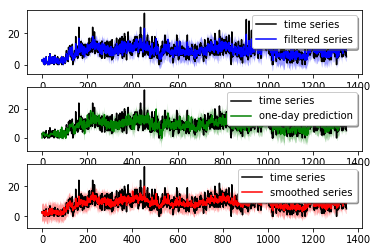

In [92]:
simple_dlm.turnOff('data points')
simple_dlm.plot()

In [93]:
simple_dlm.getMSE()

17.137725809846614

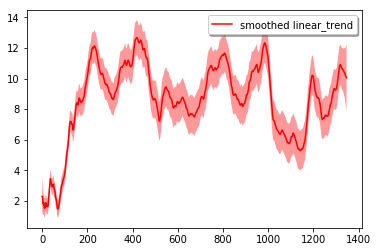

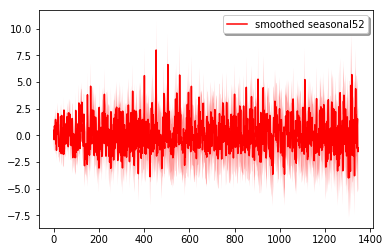

In [94]:
# Plot each component (attribute the time series to each component)
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal52')

### Dynamic Linear Regression

In [131]:
feature_cols = ['day_of_week', 'au_rolling_5', 'au_rolling_12', 'au_rolling_20']
features = df[feature_cols].values.tolist()

In [132]:
regressor10 = dynamic(features=features, discount=1.0, name='regressor10', w=10)

In [133]:
drm = dlm(y) + linear_trend + seasonal52 + regressor10

In [134]:
drm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [135]:
drm.getMSE()

19.021178879172364

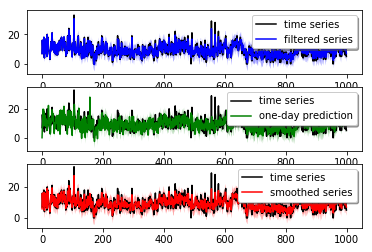

In [136]:
drm.turnOff('data points')
drm.plot()

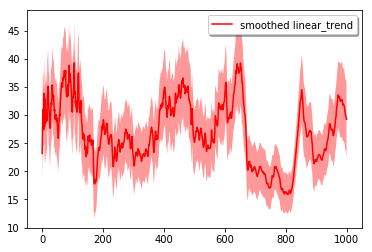

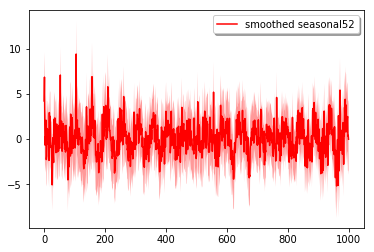

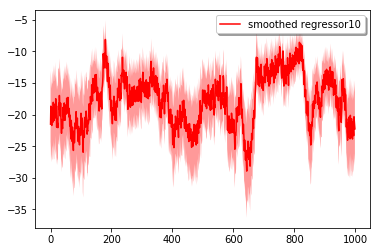

In [137]:
drm.turnOff('predict plot')
drm.turnOff('filtered plot')
drm.plot('linear_trend')
drm.plot('seasonal52')
drm.plot('regressor10')